# Tratamento do datasets

In [0]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import numpy as np

sns.set_style('darkgrid')

%matplotlib inline

In [4]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

init_notebook_mode(connected=True)
cf.go_offline()

In [0]:
db_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
db_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
db_recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [0]:
db_deaths_country = db_deaths.groupby(['Country/Region']).sum()
db_confirmed_country = db_confirmed.groupby(['Country/Region']).sum()
db_recovered_country = db_recovered.groupby(['Country/Region']).sum()

In [0]:
db_deaths_country.drop(['Lat','Long'],axis=1,inplace=True)
db_confirmed_country.drop(['Lat','Long'],axis=1,inplace=True)
db_recovered_country.drop(['Lat','Long'],axis=1,inplace=True)

In [14]:
db_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171,2335,2469,2704,2894,3224,3392,3563,3778,4033,4402,4687,4963,5226,5639,6053,6402,6664,7072,7653,8145,8676,9216,9998,10582,11173,11831,12456,13036,13659,14525
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773,782,789,795,803,820,832,842,850,856,868,872,876,880,898,916,933,946,948,949,964,969,981,989,998,1004,1029,1050,1076,1099,1122
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006,4154,4295,4474,4648,4838,4997,5182,5369,5558,5723,5891,6067,6253,6442,6629,6821,7019,7201,7377,7542,7728,7918,8113,8306,8503,8697,8857,8997,9134,9267
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745,745,747,748,750,751,751,752,752,754,755,755,758,760,761,761,761,761,761,761,762,762,762,762,762,763,763,763,763,764,764
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27,30,35,35,35,36,36,36,43,43,45,45,45,45,48,48,48,48,50,52,52,58,60,61,69,70,70,71,74,81,84


# Gráficos

In [94]:
date = '5/30/20'
n

6

## Confirmados

In [0]:
maxconfirmed = db_confirmed_country[date].sort_values(ascending=False)[:n]

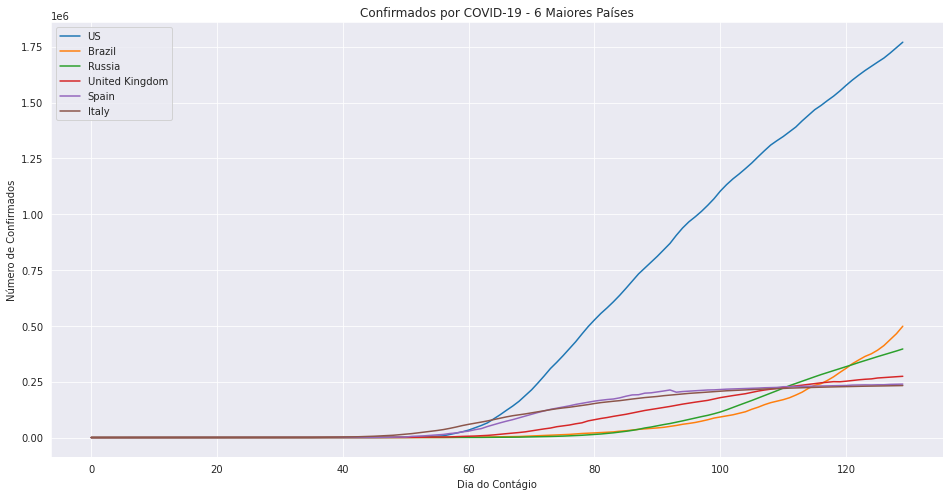

In [97]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(16,8))
n = 6
for i in maxconfirmed.index:
  ax.plot(range(db_confirmed_country.T.shape[0]), db_confirmed_country.T[i],label=i)
plt.xlabel('Dia do Contágio')
plt.ylabel('Número de Confirmados')
plt.title('Confirmados por COVID-19 - {} Maiores Países'.format(n))
plt.legend()
plt.savefig('confirmedcovid.png')

In [0]:
percconfirm = pd.DataFrame(np.zeros((130,188)), index = db_confirmed_country.columns, columns=db_confirmed_country.index)

In [0]:
for i in db_confirmed_country.T.columns:
  for j in range(db_confirmed_country.T.shape[0]-1):
    if db_confirmed_country.T[i][j] != 0:
      percconfirm[i][j+1] = ((db_confirmed_country.T[i][j+1]- db_confirmed_country.T[i][j])/db_confirmed_country.T[i][j])

In [0]:
a = pd.DataFrame(percconfirm.T[date].sort_values(ascending = True)).T
ixmaxconf = a[maxconfirmed.index].columns

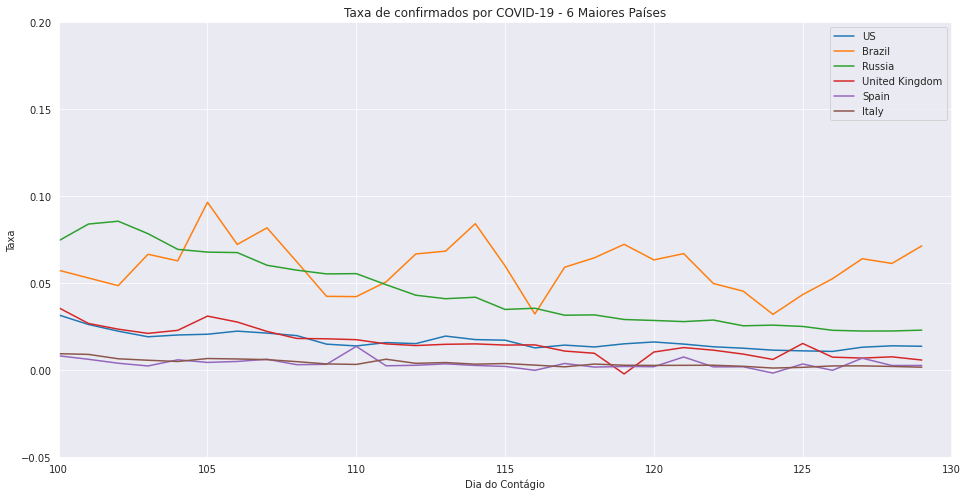

In [177]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(16,8))
n = 6
for i in ixmaxconf:
  ax.plot(range(percconfirm.shape[0]), percconfirm[i],label=i)
  ax.set_xlim(100,130)
  ax.set_ylim(-0.05,0.2)
plt.xlabel('Dia do Contágio')
plt.ylabel('Taxa')
plt.title('Taxa de confirmados por COVID-19 - {} Maiores Países'.format(n))
plt.legend()

In [120]:
pd.DataFrame(maxconfirmed)

,5/30/20
Country/Region,
US,1770165
Brazil,498440
Russia,396575
United Kingdom,274219
Spain,239228
Italy,232664


In [128]:
pd.DataFrame(percconfirm[maxconfirmed.index],columns=percconfirm[maxconfirmed.index].columns)

Country/Region,US,Brazil,Russia,United Kingdom,Spain,Italy
1/22/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1/23/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1/24/20,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1/25/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1/26/20,1.500000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
5/26/20,0.011196,0.043543,0.025224,0.015433,0.003649,0.001725
5/27/20,0.010865,0.052653,0.023011,0.007577,0.000000,0.002533
5/28/20,0.013287,0.064147,0.022583,0.007032,0.006971,0.002566
5/29/20,0.014094,0.061446,0.022614,0.007759,0.002766,0.002227


## Mortes

In [0]:
maxdeaths = db_deaths_country[date].sort_values(ascending=False)[:n]

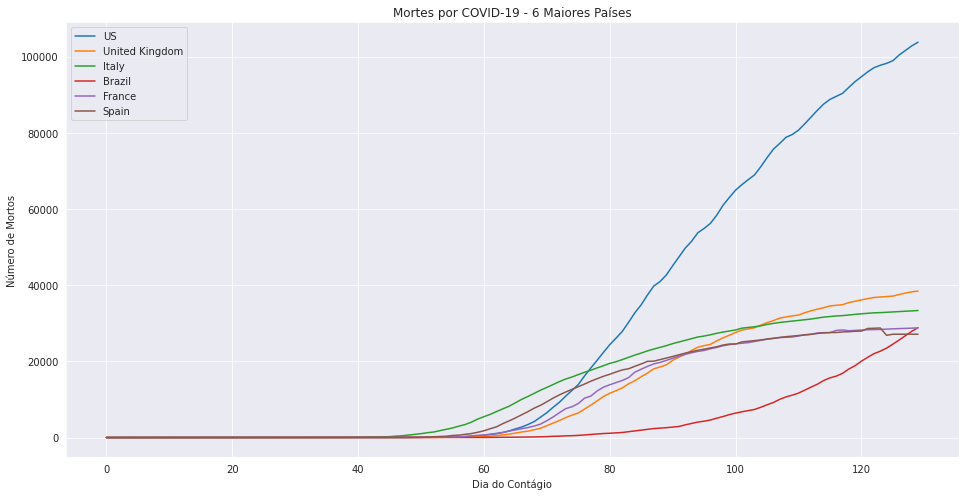

In [99]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(16,8))
n = 6
for i in maxdeaths.index:
  ax.plot(range(db_deaths_country.T.shape[0]), db_deaths_country.T[i],label=i)
plt.xlabel('Dia do Contágio')
plt.ylabel('Número de Mortos')
plt.title('Mortes por COVID-19 - {} Maiores Países'.format(n))
plt.legend()
plt.savefig('deathscovid.png')

In [0]:
percdeaths = pd.DataFrame(np.zeros((130,188)), index = db_deaths_country.columns, columns=db_deaths_country.index)

In [0]:
for i in db_deaths_country.T.columns:
  for j in range(db_deaths_country.T.shape[0]-1):
    if db_deaths_country.T[i][j] != 0:
      percdeaths[i][j+1] = ((db_deaths_country.T[i][j+1]- db_deaths_country.T[i][j])/db_deaths_country.T[i][j])

In [191]:
b = pd.DataFrame(percdeaths.T[date].sort_values(ascending = False)).T
ixmaxdeaths = b[maxdeaths.index].columns
ixmaxdeaths

Index(['US', 'United Kingdom', 'Italy', 'Brazil', 'France', 'Spain'], dtype='object', name='Country/Region')

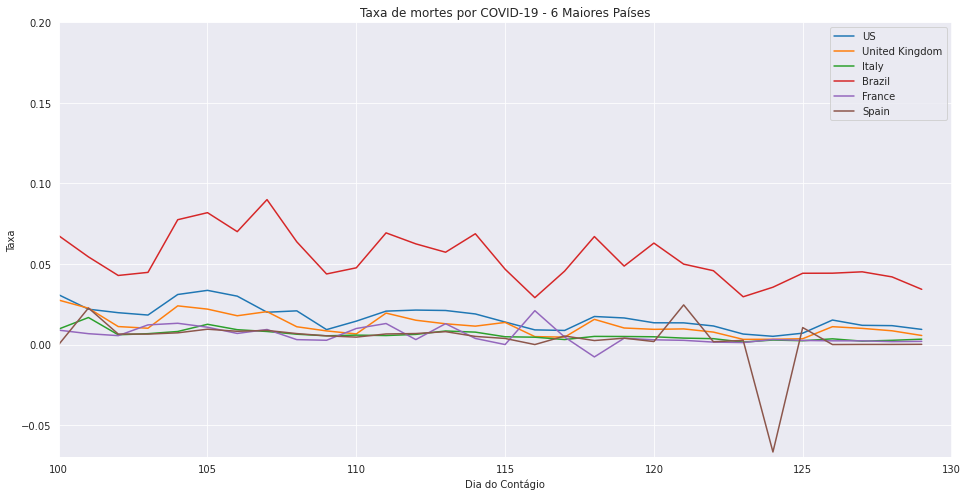

In [201]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(16,8))
n = 6
for i in ixmaxdeaths:
  ax.plot(range(percdeaths.shape[0]), percdeaths[i],label=i)
  ax.set_xlim(100,130)
  ax.set_ylim(-0.07,0.2)
plt.xlabel('Dia do Contágio')
plt.ylabel('Taxa')
plt.title('Taxa de mortes por COVID-19 - {} Maiores Países'.format(n))
plt.legend()

In [100]:
pd.DataFrame(maxdeaths)

,5/30/20
Country/Region,
US,103776
United Kingdom,38458
Italy,33340
Brazil,28834
France,28774
Spain,27125


In [194]:
pd.DataFrame(percdeaths[maxdeaths.index],columns=percdeaths[maxdeaths.index].columns)

Country/Region,US,United Kingdom,Italy,Brazil,France,Spain
1/22/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1/23/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1/24/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1/25/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1/26/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
5/26/20,0.007056,0.003622,0.002372,0.044264,0.002565,0.010546
5/27/20,0.015216,0.011096,0.003550,0.044305,0.002313,0.000000
5/28/20,0.011940,0.010042,0.002117,0.045160,0.002308,0.000074
5/29/20,0.011740,0.008545,0.002625,0.042012,0.001814,0.000074


## Recuperados

In [0]:
maxrecovered = db_recovered_country[date].sort_values(ascending=False)[:n]

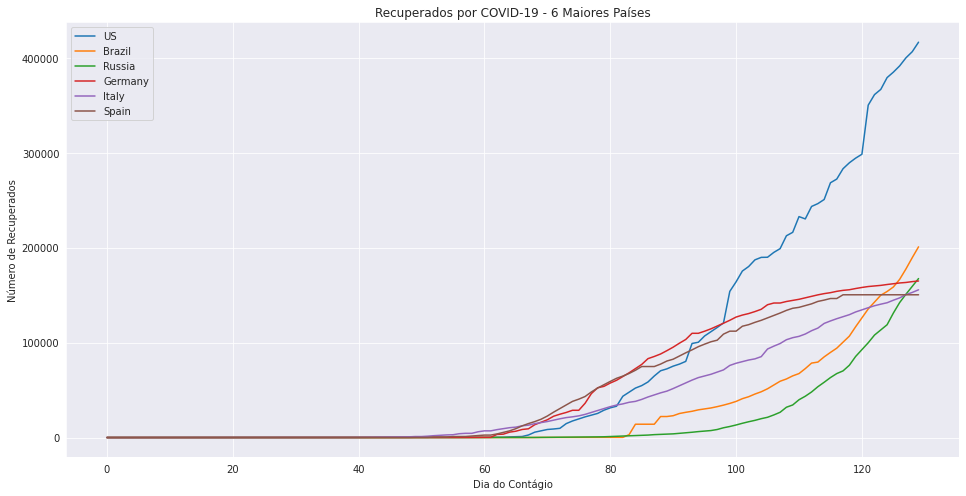

In [102]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(16,8))
n = 6
for i in maxrecovered.index:
  ax.plot(range(db_recovered_country.T.shape[0]), db_recovered_country.T[i],label=i)
plt.xlabel('Dia do Contágio')
plt.ylabel('Número de Recuperados')
plt.title('Recuperados por COVID-19 - {} Maiores Países'.format(n))
plt.legend()
plt.savefig('revoredcovid.png')

In [0]:
percrecovered = pd.DataFrame(np.zeros((130,188)), index = db_recovered_country.columns, columns=db_recovered_country.index)

In [0]:
for i in db_recovered_country.T.columns:
  for j in range(db_recovered_country.T.shape[0]-1):
    if db_recovered_country.T[i][j] != 0:
      percrecovered[i][j+1] = ((db_recovered_country.T[i][j+1]- db_recovered_country.T[i][j])/db_recovered_country.T[i][j])

In [197]:
b = pd.DataFrame(percrecovered.T[date].sort_values(ascending = False)).T
ixmaxrecovered = b[maxrecovered.index].columns
ixmaxrecovered

Index(['US', 'Brazil', 'Russia', 'Germany', 'Italy', 'Spain'], dtype='object', name='Country/Region')

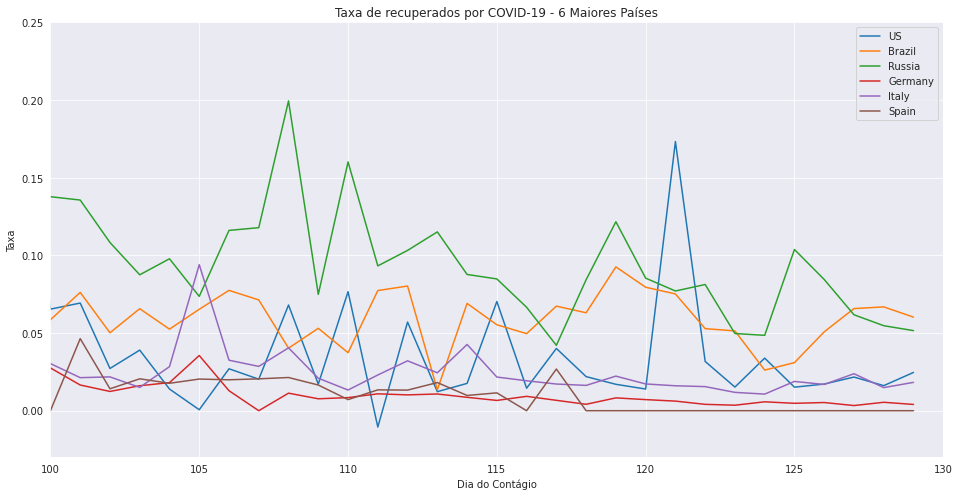

In [200]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(16,8))
n = 6
for i in ixmaxrecovered:
  ax.plot(range(percrecovered.shape[0]), percrecovered[i],label=i)
  ax.set_xlim(100,130)
  ax.set_ylim(-0.03,0.25)
plt.xlabel('Dia do Contágio')
plt.ylabel('Taxa')
plt.title('Taxa de recuperados por COVID-19 - {} Maiores Países'.format(n))
plt.legend()

In [103]:
pd.DataFrame(maxrecovered)

,5/30/20
Country/Region,
US,416461
Brazil,200892
Russia,167469
Germany,164908
Italy,155633
Spain,150376


In [199]:
pd.DataFrame(percrecovered[maxrecovered.index],columns=percrecovered[maxrecovered.index].columns)

Country/Region,US,Brazil,Russia,Germany,Italy,Spain
1/22/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1/23/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1/24/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1/25/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1/26/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...
5/26/20,0.015152,0.030943,0.103798,0.004764,0.018855,0.0
5/27/20,0.017163,0.050784,0.084489,0.005267,0.016888,0.0
5/28/20,0.021668,0.065750,0.061776,0.003317,0.023814,0.0
5/29/20,0.016138,0.066845,0.054731,0.005417,0.014873,0.0
